<a href="https://colab.research.google.com/github/buithanhdam/ML23_KaggleProjectTitanic/blob/main/ML23_KaggleProjectTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Machine Learning Titanic using Kaggle 2023 by buithanhdam**

In [1]:
# Libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [2]:

# connect gg drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/Titanic'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Titanic


#1 **Data evaluation**





- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex
- Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes:
1. pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
3. sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
4. parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:

train_df = pd.read_csv('train.csv',index_col='PassengerId')
test_df = pd.read_csv('test.csv',index_col='PassengerId')

print(train_df.columns)
print(test_df.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print('shape of train set: ',train_df.shape)
print('shape of test set: ',test_df.shape)

shape of train set:  (891, 11)
shape of test set:  (418, 10)


In [5]:
train_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [6]:
test_df.head(7)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


Text(0.5, 1.0, 'Distribution of Missing Values')

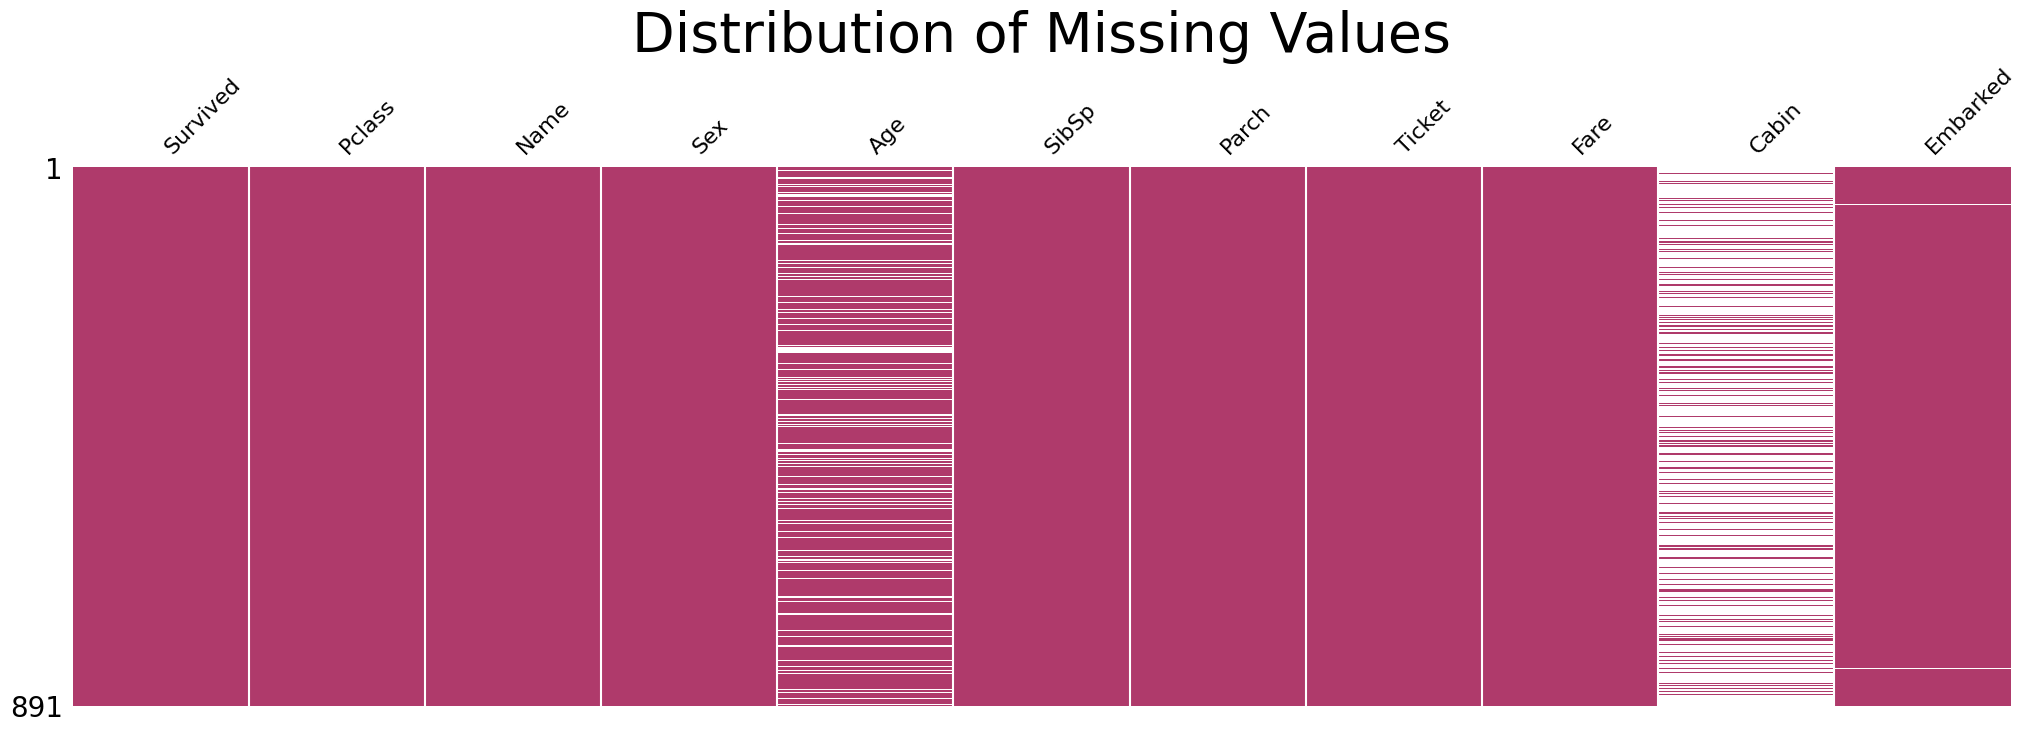

In [7]:

msno.matrix(train_df, sparkline=False, figsize=(25,7), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

#2 **Feature classification**


1.   Catgorical
2.   Numerical



In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


**Feature classification**

- Catgorical:
`Survived (train_set)`,
`Pclass`,
`Sex`,
`Embarked`,
`SibSp`,
`Parch`,
- Numerical:
`Age`,
`Fare`
- Mix:
`Cabin`, `Ticket`
- Error/Typo: `Name`
- Missing values (NaN, Null):
1. Train_set: `Cabin` > `Age` > `Embarked`
2. Test_set: `Cabin` > `Age` > `Fare`
- Type of values: String,Int64,Float64

##2.1 **Change features type**

In [10]:
# change Survived type (Train set)
train_df["Survived"] = train_df["Survived"].astype("category")

In [11]:
# create a function to change feature type of train and test set


features = ["Pclass","Sex","Embarked","SibSp","Parch"]
def change_type(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
change_type(train_df,features)
change_type(test_df,features)

**Result**

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


##2.2 **Distribution of Numerical features**

In [14]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [15]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


#3 **Data Analysis (EDA)**

## **3.1 Correlating categorical features**
- Catgorical: `Survived` (train_set), `Pclass`, `Sex`, `Embarked`, `SibSp`, `Parch`

### **Target values: `Survived`**

In [16]:
train_df["Survived"].value_counts().to_frame()
# 0 = No
# 1 = Yes

,Survived
0,549
1,342


In [17]:
train_df["Survived"].value_counts(normalize=True).to_frame()
# 61.6162% = No = 0
# 38.3838% = Yes = 1

,Survived
0,0.616162
1,0.383838


***Only 38% survival , this is data imbalance but it is not severse so it dont need to use technique like sampling to tackle the imbalance***

### **Sex**

In [18]:
train_df["Sex"].value_counts().to_frame()


,Sex
male,577
female,314


In [19]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

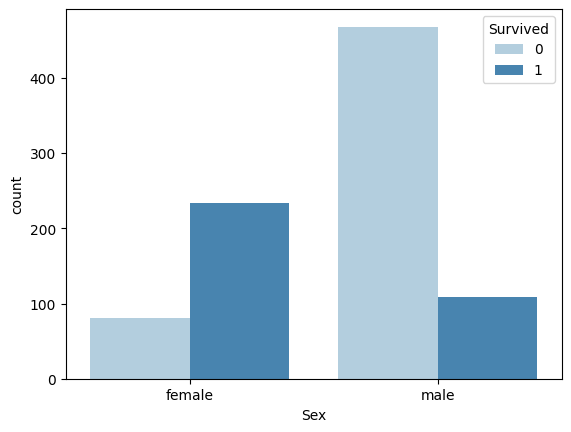

In [20]:
# relationship of sex and survived
sb.countplot(data=train_df, x="Sex", hue="Survived" , palette="Blues")

### **Remaining category features**


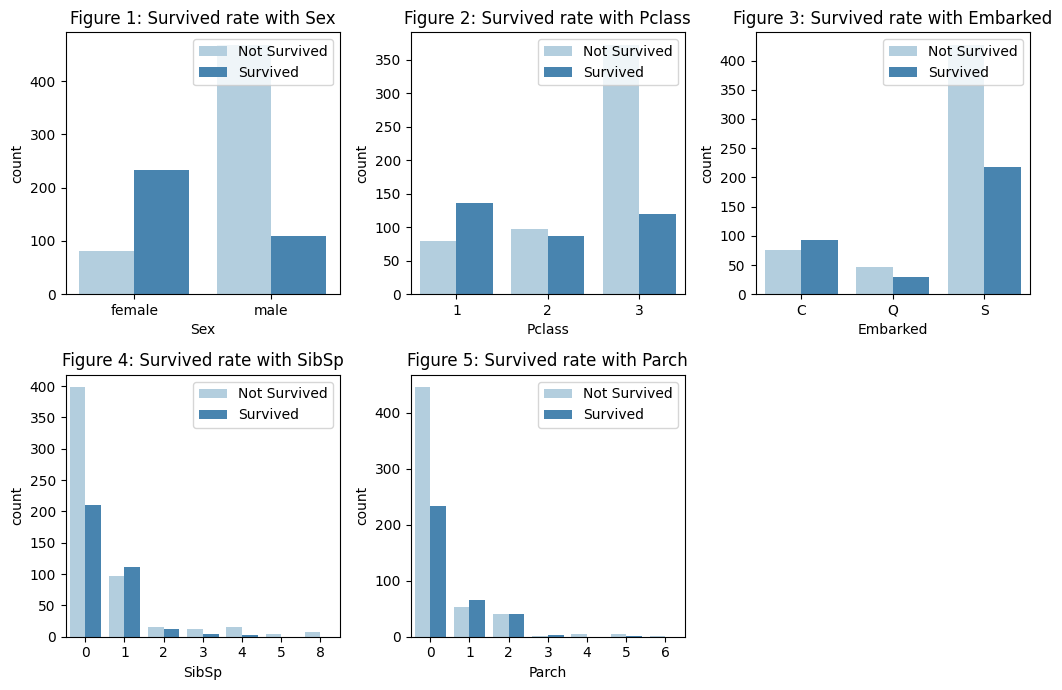

In [21]:
features = ["Sex","Pclass","Embarked","SibSp","Parch"]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r*n_cols + c # index of features
    if i < len(features):
      ax_i = ax[r,c]
      sb.countplot(data=train_df, x=features[i], hue="Survived" , palette="Blues", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Survived rate with {features[i]}")
      ax_i.legend(title='', loc="upper right", labels = ["Not Survived","Survived"])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()


## **3.2 EDA for Numerical features**

- Numerical: `Age`, `Fare`

### **Age**

<Axes: xlabel='Age', ylabel='Count'>

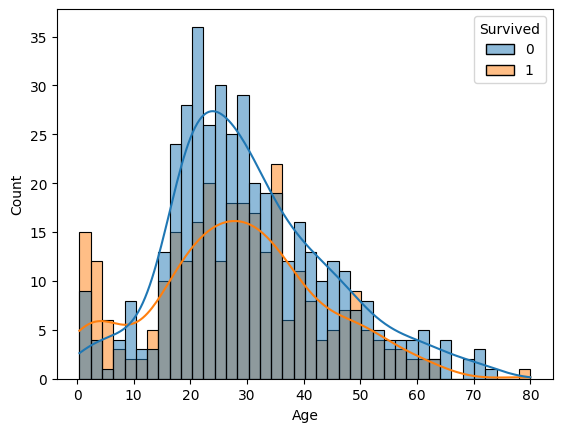

In [22]:
sb.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True)

- Majority passengers were from 18- 48
- Children passengers have highest survived rate

### **Fare**

In [23]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

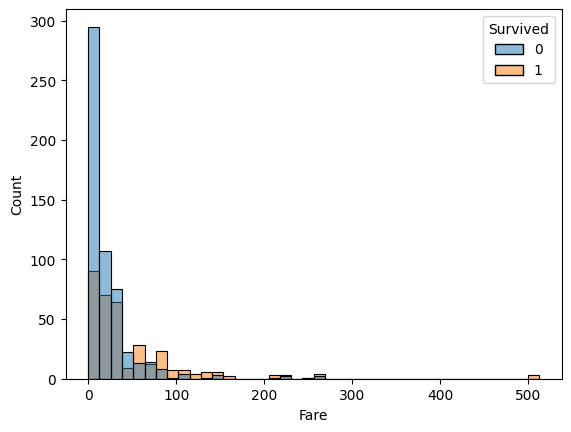

In [24]:
sb.histplot(data=train_df, x='Fare', hue='Survived', bins=40)

- Use pandas.qcut, cut Fare values to 4 part
1. Economic (0 - 25%) `-0.001 - 7.91$`
2. Standard (25 - 50%) `7.91$ - 14.454$`
3. Expensive (50 - 75%) `14.454$ - 31.0$`
4. Luxury (75% - max) `31.0$ - 512.329$`

<Axes: xlabel='Fare', ylabel='count'>

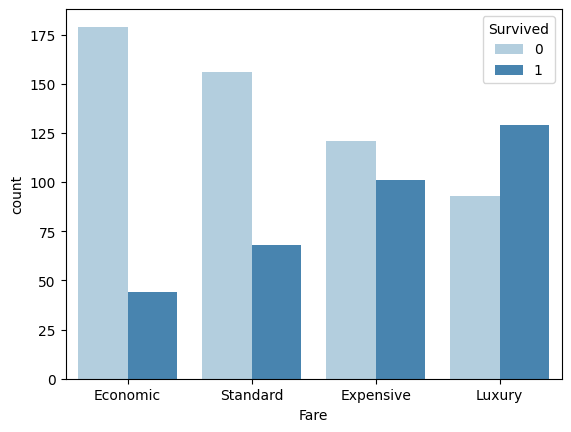

In [25]:
# pd.qcut(train_df['Fare'],4)
fare_categories = ["Economic","Standard","Expensive","Luxury"]
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

pd.qcut(test_df['Fare'], 4, labels=fare_categories)
sb.countplot(x= quartile_data, hue=train_df['Survived'], palette='Blues')

- With this plot we can see people from Economic to Expensive not survived more than people survived
- People from Luxury Fare more survived than not survived

#4 **Feature engineering and Wranling**

## 4.1 **Feature engineering**

- Use `Regular expressions` regex101

### **Name**

In [26]:

def regExName(name):
  x = re.search(",([\w\s]+)\.", name).groups(1)[0]
  return x.strip()
train_df['Title'] = train_df['Name'].apply(lambda name : regExName(name))
test_df['Title'] = test_df['Name'].apply(lambda name : regExName(name))
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [27]:
def change_title(title):
  titles = ['Mr','Miss','Mrs','Master']
  if title in titles:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'
#print("A") if a > b else print("B")
train_df['Title'] = train_df['Title'].apply(lambda title: change_title(title))

train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [28]:

test_df['Title'] = test_df['Title'].apply(lambda title : change_title(title))
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

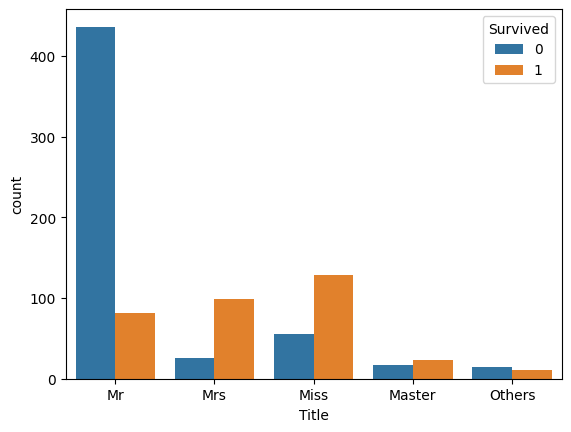

In [29]:
sb.countplot(data=train_df, x= 'Title', hue= 'Survived')

- This plot let we known that Title feature can be use in train model

### **Family**
Mix of 2 features
- `SibSp` number of brothers, sisters , cousins
- `Parch` number of parents , childs

In [30]:
# train_df.drop(['Family'], axis=1,inplace=True)
train_df['Family_Size'] = train_df['SibSp'].astype('int64') + train_df['Parch'].astype('int64')+1
train_df.tail(15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
PassengerId,,,,,,,,,,,,,
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,Mr,1
878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Mr,1
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs,2
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Mrs,2
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr,1
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Miss,1
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr,1
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_Size  891 non-null    int64   
dtypes: category(6), float64(2), int64(1), object(4)
memory usage: 62.1+ KB


In [32]:
# test_df.drop(['Family'], axis=1,inplace=True)
test_df['Family_Size'] = test_df['SibSp'].astype('int64') + test_df['Parch'].astype('int64')+1
# test_df.tail(15)

<Axes: xlabel='Family_Size', ylabel='count'>

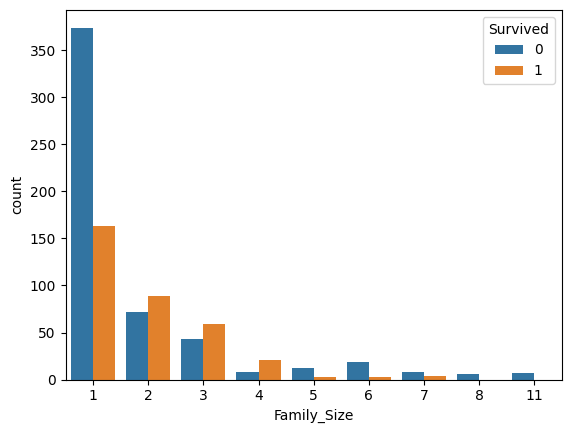

In [33]:
sb.countplot(data = train_df,x = 'Family_Size',hue = 'Survived')

#### Create **Family_Category**
- As we see in plot family_size feature with that values we can cut this values of feature to 4 family's category
- `0-1 people` (passenger go alone) `Single`
- `2-4` people `Small`
- `5-6` people `Medium`
- `Over 6` people `Large`

<Axes: xlabel='Family_Category', ylabel='count'>

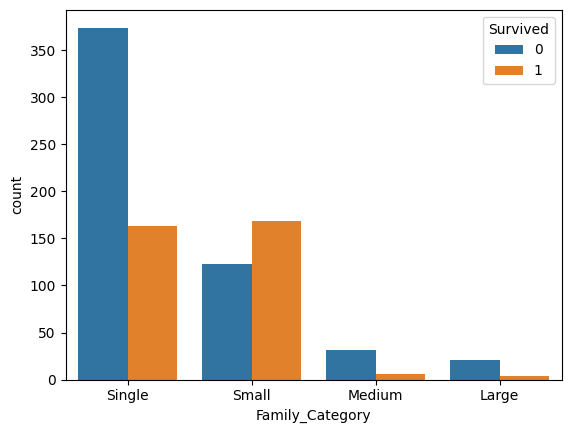

In [34]:
train_df['Family_Category']=pd.cut(train_df['Family_Size'],bins = [0,1,4,6,20],labels=['Single','Small','Medium','Large'])
sb.countplot(data = train_df,x = 'Family_Category',hue = 'Survived')

In [35]:
train_df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Category
PassengerId,,,,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr,1,Single
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Miss,1,Single
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr,1,Single
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,Single
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs,6,Medium
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,Single
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Single
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,Single


In [36]:
test_df['Family_Category']=pd.cut(test_df['Family_Size'],bins = [0,1,4,6,20],labels=['Single','Small','Medium','Large'])

## 4.2 **Wrangling**

In [37]:
num_features = ['Age','Fare']
cat_features = ['Pclass','Sex','Embarked','Title','Family_Category']

features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_Category']


### **Check missing values**

In [38]:
def display_missing(df,features_cols):
  num_rows = df.shape[0]
  for col in features_cols:
    missing = df[col].isnull().sum()
    if missing > 0:
      print(f"Col {col} has {missing * 100 / num_rows:.2f}% missing percent")

display_missing(train_df,features_cols)
display_missing(test_df,features_cols)

Col Age has 19.87% missing percent
Col Embarked has 0.22% missing percent
Col Age has 20.57% missing percent
Col Fare has 0.24% missing percent


#### Age
- Filling missing values with `median` of whole values
- you can use SimpleImputer to fill
- But in this case we must use `groupby` and `fill` because female or male have different age median

In [39]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

<ipython-input-39-1c0bc992bf95>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [40]:
# filling values
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda age : age.fillna(age.median()))

test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda age : age.fillna(age.median()))

<ipython-input-40-4144c184a1e3>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda age : age.fillna(age.median()))
<ipython-input-40-4144c184a1e3>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.grou

In [41]:

display_missing(train_df,features_cols)
display_missing(test_df,features_cols)

Col Embarked has 0.22% missing percent
Col Fare has 0.24% missing percent


### **Pipeline**

In [44]:
X = train_df[features_cols]
y = train_df['Survived']
X_test = test_df[features_cols]

- Use `pipeline` to active preprocessing and missing together
- `StandardScaler` to normalization `numerical data`
- `OneHotEncoder` for `Categorical data`
- `LabelEncoder` for `Label data`
- `SimpleImputer` for fill `missing values`

In [43]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [45]:
#preprocessing
# use pipeline to fill missing and normalization data for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy ='median')),
    ('scaler',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy ='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [46]:
# use columnTransformer to transform features_col for categorical and numericl
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])


In [48]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'Title',
                                  'Family_Category'])])

In [49]:
X = preprocessor.transform(X) # X = X transform

In [50]:
X_test = preprocessor.transform(X_test)

### **Split data**
- we have X_test data and dont have Y_test (we must use model)
- We need to split X, y  data to 80% X, y train and 20% X, y Validation
- Use train_test_split

In [51]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)